# Data importation

In [3]:
import pandas as pd

# Define the file path (just the file name since it's in the same folder)
file_path = "london landmarks (1).xlsx"

# Load the Excel file
excel_data = pd.ExcelFile(file_path)

# Check the sheet names to understand the structure of the file
sheet_names = excel_data.sheet_names
print("Sheet names:", sheet_names)

# Load data from the first sheet (or specify the sheet name if known)
sheet_name = sheet_names[0]  # Replace with the desired sheet name or index
data = excel_data.parse(sheet_name)

# Display the first few rows of the data
print(data.head())


Sheet names: ['Sheet2']
            Landmark   Latitude   Longitude
0    Barbican Centre    51.5202     -0.0938
1            Big Ben    51.5007     -0.1246
2     British Museum    51.5194     -0.1270
3  Buckingham Palace    51.5014     -0.1419
4  Cabinet War Rooms    51.5022     -0.1271


In [4]:
data.columns

Index(['Landmark', ' Latitude', ' Longitude'], dtype='object')

# London Land mark vizualizations

In [5]:
import pandas as pd
import folium

# Load the Excel file (assuming the data is already loaded as 'data')
file_path = "london landmarks (1).xlsx"
data = pd.read_excel(file_path)

# Clean the column names (optional, removes leading/trailing whitespace)
data.columns = data.columns.str.strip()

# Create a base map centered around London's approximate location
map_center = [51.509865, -0.118092]  # Central London coordinates
landmarks_map = folium.Map(location=map_center, zoom_start=12)

# Add each landmark to the map
for _, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Landmark']
    ).add_to(landmarks_map)

# Save the map to an HTML file
landmarks_map.save("london_landmarks_map.html")

# Display the map directly in a Jupyter Notebook (if you're using one)
landmarks_map


# Crime Data

In [6]:
import pandas as pd
import os

# Define the folder containing the CSV files
folder_path = "/home/dragon/GIT/Data/2024-10"  # Full path to the directory

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# Initialize an empty list to hold the data
data_frames = []

# Loop through the files and read each into a DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df['Source File'] = file  # Add a column to track the source file (optional)
    data_frames.append(df)

# Combine all DataFrames into one
crime_data = pd.concat(data_frames, ignore_index=True)

# Display the first few rows of the combined data
print(crime_data.head())



  Crime ID    Month            Reported by           Falls within  Longitude  \
0      NaN  2024-10  West Yorkshire Police  West Yorkshire Police  -1.472961   
1      NaN  2024-10  West Yorkshire Police  West Yorkshire Police  -1.875632   
2      NaN  2024-10  West Yorkshire Police  West Yorkshire Police  -1.863081   
3      NaN  2024-10  West Yorkshire Police  West Yorkshire Police  -1.912582   
4      NaN  2024-10  West Yorkshire Police  West Yorkshire Police  -1.883058   

    Latitude                    Location  LSOA code      LSOA name  \
0  53.599861     On or near Railway Walk  E01007439  Barnsley 001D   
1  53.944325      On or near Wharfe Park  E01010646  Bradford 001A   
2  53.938891         On or near Millfold  E01010646  Bradford 001A   
3  53.948878   On or near Crossbank Road  E01010646  Bradford 001A   
4  53.941878  On or near Southfield Road  E01010647  Bradford 001B   

              Crime type Last outcome category  Context  \
0  Anti-social behaviour               

In [7]:
# Drop the specified columns from the combined data
columns_to_drop = ['Crime ID', 'Source File', 'Last outcome category', 'Context']
crime_data_clean = crime_data.drop(columns=columns_to_drop, errors='ignore')  # Use errors='ignore' to handle missing columns

# Display the first few rows of the updated DataFrame
crime_data_clean




,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2024-10,West Yorkshire Police,West Yorkshire Police,-1.472961,53.599861,On or near Railway Walk,E01007439,Barnsley 001D,Anti-social behaviour
1,2024-10,West Yorkshire Police,West Yorkshire Police,-1.875632,53.944325,On or near Wharfe Park,E01010646,Bradford 001A,Anti-social behaviour
2,2024-10,West Yorkshire Police,West Yorkshire Police,-1.863081,53.938891,On or near Millfold,E01010646,Bradford 001A,Anti-social behaviour
3,2024-10,West Yorkshire Police,West Yorkshire Police,-1.912582,53.948878,On or near Crossbank Road,E01010646,Bradford 001A,Anti-social behaviour
4,2024-10,West Yorkshire Police,West Yorkshire Police,-1.883058,53.941878,On or near Southfield Road,E01010647,Bradford 001B,Anti-social behaviour
...,...,...,...,...,...,...,...,...,...
502419,2024-10,Staffordshire Police,Staffordshire Police,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences
502420,2024-10,Staffordshire Police,Staffordshire Police,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences
502421,2024-10,Staffordshire Police,Staffordshire Police,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences
502422,2024-10,Staffordshire Police,Staffordshire Police,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


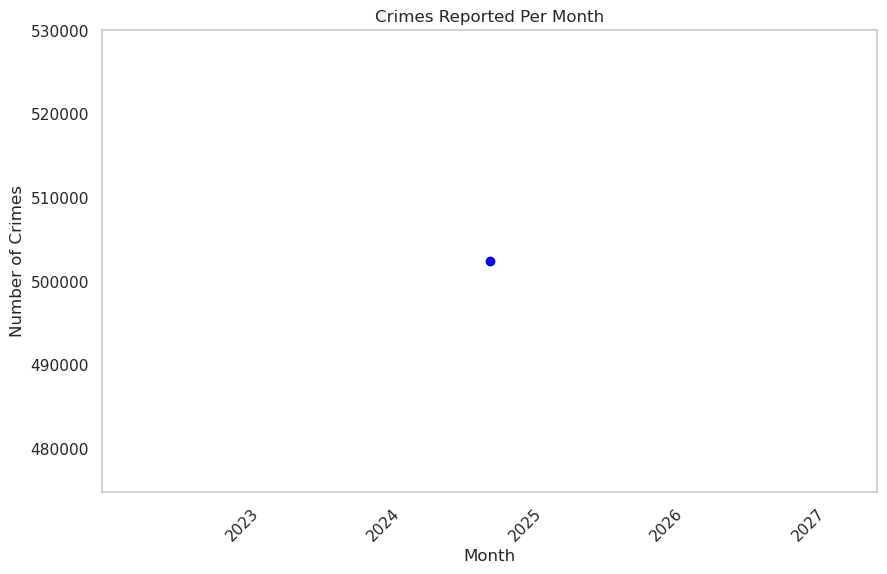

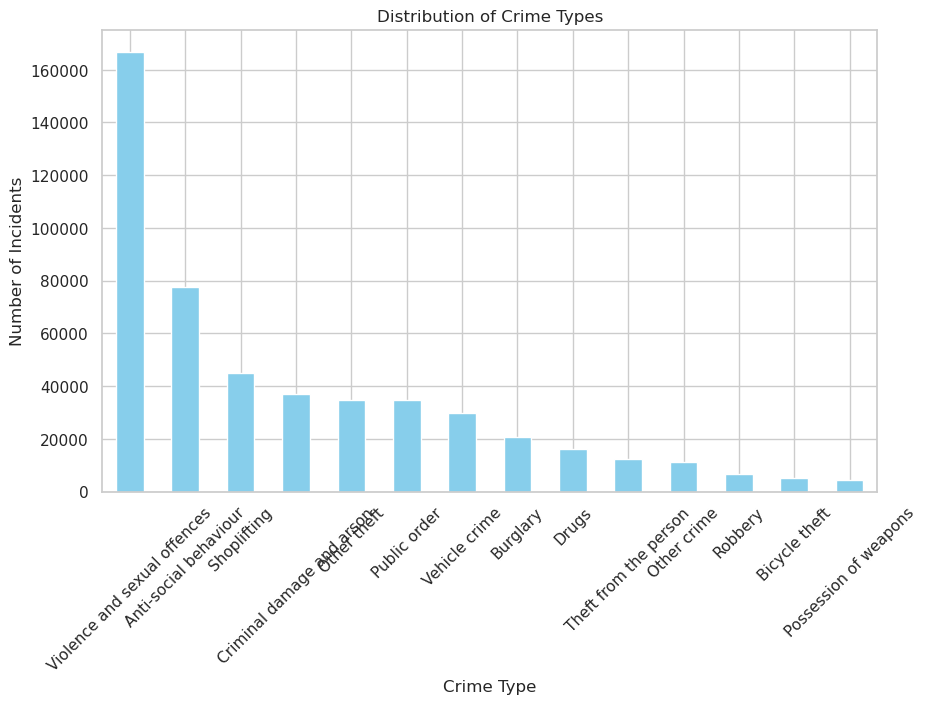

/tmp/ipykernel_205034/4015889535.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_lsoa.values, y=top_lsoa.index, palette="viridis")


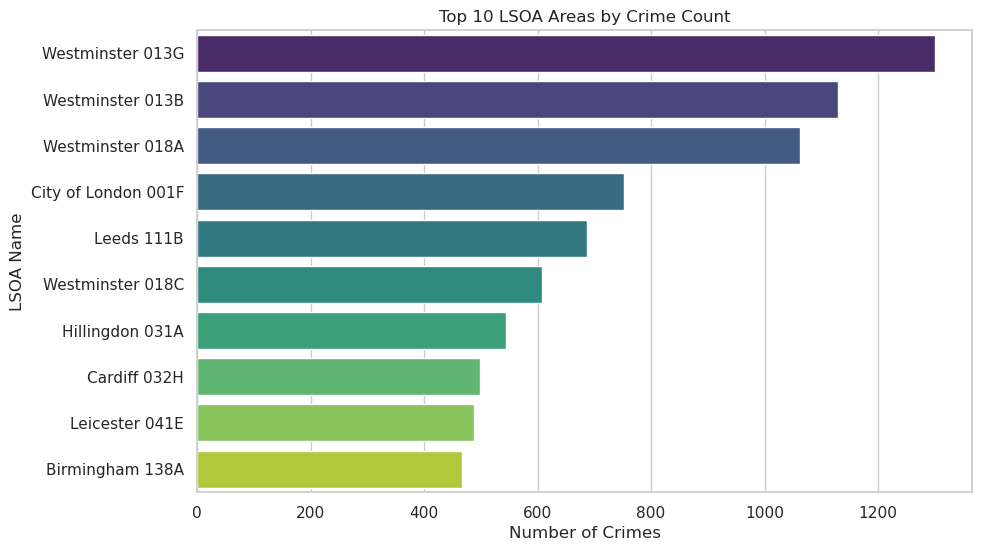

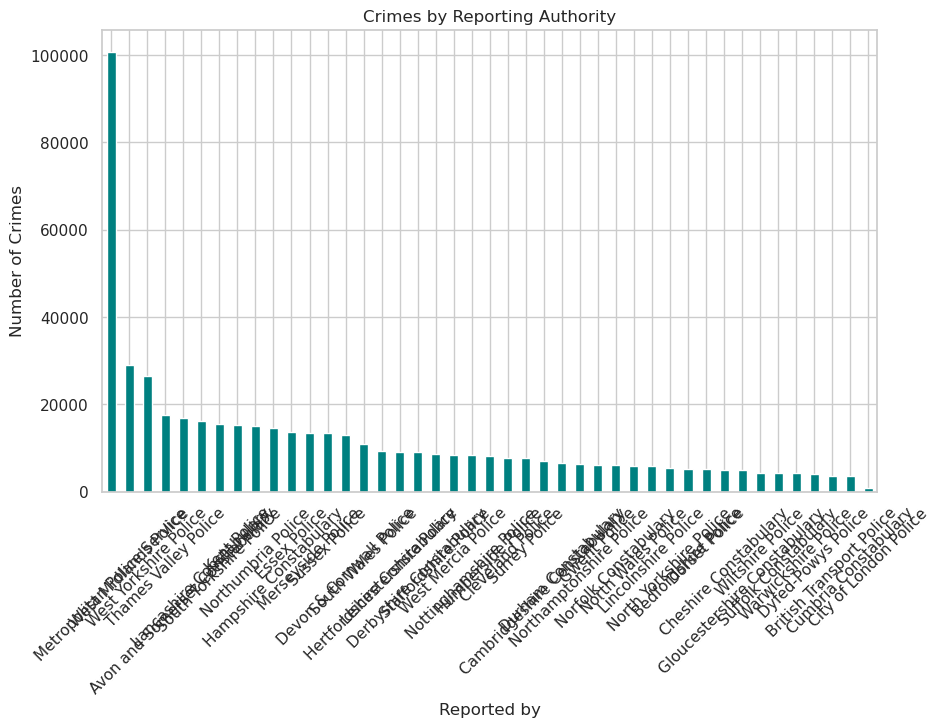

/tmp/ipykernel_205034/4015889535.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="coolwarm")


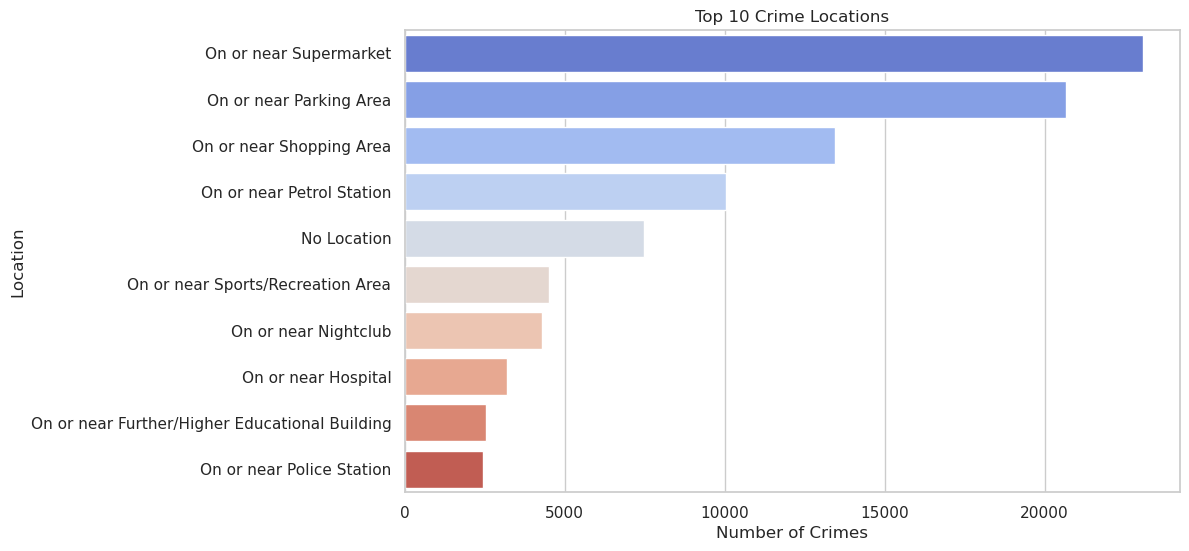

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crime_data = crime_data_clean

# Convert 'Month' column to datetime for proper handling
crime_data['Month'] = pd.to_datetime(crime_data['Month'])


# Set plot style
sns.set(style="whitegrid")

# 1. Crimes Reported Per Month (Line Plot)
plt.figure(figsize=(10, 6))
crime_per_month = crime_data['Month'].dt.to_period('M').value_counts().sort_index()
crime_per_month.plot(kind='line', marker='o', color='blue')
plt.title("Crimes Reported Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 2. Crime Type Distribution (Bar Chart)
plt.figure(figsize=(10, 6))
crime_data['Crime type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Crime Types")
plt.xlabel("Crime Type")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.show()

# 3. Top 10 LSOA Areas by Crime Count (Bar Chart)
plt.figure(figsize=(10, 6))
top_lsoa = crime_data['LSOA name'].value_counts().head(10)
sns.barplot(x=top_lsoa.values, y=top_lsoa.index, palette="viridis")
plt.title("Top 10 LSOA Areas by Crime Count")
plt.xlabel("Number of Crimes")
plt.ylabel("LSOA Name")
plt.show()

# 4. Crimes by Reporting Authority (Bar Chart)
plt.figure(figsize=(10, 6))
crime_data['Reported by'].value_counts().plot(kind='bar', color='teal')
plt.title("Crimes by Reporting Authority")
plt.xlabel("Reported by")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

# 5. Crimes by Location (Bar Chart)
plt.figure(figsize=(10, 6))
top_locations = crime_data['Location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="coolwarm")
plt.title("Top 10 Crime Locations")
plt.xlabel("Number of Crimes")
plt.ylabel("Location")
plt.show()

# 6. Heatmap of Crime Count by Month and Crime Type (Heatmap)
crime_monthly_type = pd.crosstab(crime_data['Month'].dt.to_period('M'), crime_data['Crime type'])
plt.figure(figsize=(12, 8))
sns.heatmap(crime_monthly_type.T, cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Crime Count by Month and Crime Type")
plt.xlabel("Month")
plt.ylabel("Crime Type")
plt.show()

# 7. Crime Type Percentage (Pie Chart)
plt.figure(figsize=(8, 8))
crime_type_counts = crime_data['Crime type'].value_counts()
crime_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Percentage of Crime Types")
plt.ylabel("")  # Hide the y-label
plt.show()

# 8. Crimes Over Time (Area Plot)
plt.figure(figsize=(10, 6))
crime_per_month.plot(kind='area', color='orange', alpha=0.7)
plt.title("Number of Crimes Over Time (Area Plot)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

# 9. Distribution of Crime Types by LSOA (Stacked Bar Plot)
# plt.figure(figsize=(12, 6))
# crime_type_lsoa = pd.crosstab(crime_data['LSOA name'], crime_data['Crime type'])
# crime_type_lsoa = crime_type_lsoa.div(crime_type_lsoa.sum(axis=1), axis=0)  # Normalize to percentages
# crime_type_lsoa.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')
# plt.title("Distribution of Crime Types by LSOA")
# plt.xlabel("LSOA Name")
# plt.ylabel("Proportion of Crime Types")
# plt.xticks(rotation=90)
# plt.show()

# 10. Crime Frequency by Latitude and Longitude (Hexbin Plot)
plt.figure(figsize=(10, 6))
plt.hexbin(crime_data['Longitude'], crime_data['Latitude'], gridsize=50, cmap='Blues')
plt.colorbar(label='Crime Frequency')
plt.title("Crime Frequency by Latitude and Longitude (Hexbin)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# 11. Box Plot of Crimes by Crime Type (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crime type', y='Longitude', data=crime_data)
plt.title("Crime Type Distribution (Longitude)")
plt.xlabel("Crime Type")
plt.ylabel("Longitude")
plt.xticks(rotation=45)
plt.show()

# 12. Histogram of Latitude (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(crime_data['Latitude'], bins=30, kde=True, color='green')
plt.title("Histogram of Latitude of Crime Locations")
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.show()

# 13. Violent Crime Types Distribution (Bar Chart)
violent_crimes = ['Anti-social behaviour', 'Burglary', 'Criminal damage and arson', 'Drugs', 'Other theft', 'Robbery', 'Shoplifting', 'Theft from the person']
violent_crime_data = crime_data[crime_data['Crime type'].isin(violent_crimes)]
plt.figure(figsize=(10, 6))
violent_crime_data['Crime type'].value_counts().plot(kind='bar', color='red')
plt.title("Distribution of Violent Crime Types")
plt.xlabel("Crime Type")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.show()

# 14. Crime Counts by LSOA (Bar Plot)
plt.figure(figsize=(12, 8))
lsoa_counts = crime_data['LSOA name'].value_counts().head(20)  # Top 20 LSOAs by crime count
sns.barplot(x=lsoa_counts.values, y=lsoa_counts.index, palette="coolwarm")
plt.title("Top 20 LSOA Areas by Crime Count")
plt.xlabel("Number of Crimes")
plt.ylabel("LSOA Name")
plt.show()

In [ ]:

# Get the top 10 locations by crime count
top_locations = crime_data['Location'].value_counts().head(10).index

# Filter the data for the top 10 locations
top_locations_data = crime_data[crime_data['Location'].isin(top_locations)]

# Create a count plot of Crime types against Location for the top 10 locations
plt.figure(figsize=(12, 8))
sns.countplot(x='Location', hue='Crime type', data=top_locations_data, palette='Set2')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set plot titles and labels
plt.title("Crime Types Across Top 10 Locations")
plt.xlabel("Location")
plt.ylabel("Number of Crimes")

# Show the plot
plt.show()

In [ ]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster



# Get the top 10 locations by crime count
top_locations = crime_data['Location'].value_counts().head(10).index

# Filter the data for the top 10 locations
top_locations_data = crime_data[crime_data['Location'].isin(top_locations)]

# Group by Latitude and Longitude to count crimes at each location
crime_counts = top_locations_data.groupby(['Latitude', 'Longitude']).size().reset_index(name='Crime Count')

# Create a base map centered around London (example coordinates)
m = folium.Map(location=[51.5074, -0.1278], zoom_start=12)

# Add MarkerCluster to group nearby markers
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each crime location
for _, row in crime_counts.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5 + row['Crime Count'] / 10,  # Scale circle size based on crime count
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Crime Count: {row['Crime Count']}",
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save("crime_map.html")

# Display the map m


# Summary statisitics

In [ ]:
crime_data = crime_data_clean

# Count crimes by each location
crime_counts_by_location = crime_data['Location'].value_counts().reset_index()
crime_counts_by_location.columns = ['Location', 'Crime Count']

# Display the results
crime_counts_by_location


In [ ]:

# Group by Latitude and Longitude to count crimes at each unique location
crime_counts_by_coordinates = (
    crime_data.groupby(['Latitude', 'Longitude'])
    .size()
    .reset_index(name='Crime Count')
)

# Display the results
crime_counts_by_coordinates


In [ ]:
# Summary statistics for numerical columns (Longitude and Latitude)
numerical_summary = crime_data[['Longitude', 'Latitude']].describe()

# Summary for categorical columns
categorical_summary = crime_data[['Month', 'Reported by', 'Falls within', 'Location', 'LSOA code', 'LSOA name', 'Crime type']].describe()

# Frequency counts for key categorical variables
frequency_counts = {
    'Month': crime_data['Month'].value_counts(),
    'Reported by': crime_data['Reported by'].value_counts(),
    'Falls within': crime_data['Falls within'].value_counts(),
    'Location': crime_data['Location'].value_counts().head(10),  # Top 10 locations
    'LSOA name': crime_data['LSOA name'].value_counts().head(10),  # Top 10 LSOA names
    'Crime type': crime_data['Crime type'].value_counts(),
}

# Display results
print("Numerical Summary:\n", numerical_summary)
print("\nCategorical Summary:\n", categorical_summary)
print("\nFrequency Counts:")
for key, value in frequency_counts.items():
    print(f"\n{key}:\n", value)



# MAchine LEarning  Model

for this one we will find places close to the landmarks from where the crime happened

In [ ]:
import pandas as pd
from geopy.distance import geodesic



# Strip column names in the tourist data (to handle leading/trailing spaces)
data.columns = data.columns.str.strip()

# Remove rows with missing Latitude or Longitude
crime_data = crime_data.dropna(subset=['Latitude', 'Longitude'])
data = data.dropna(subset=['Latitude', 'Longitude'])

# Ensure coordinates are floats
crime_data['Latitude'] = crime_data['Latitude'].astype(float)
crime_data['Longitude'] = crime_data['Longitude'].astype(float)
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)

# Define a function to calculate the distance between two coordinates
def calculate_distance(row, landmarks):
    crime_location = (row['Latitude'], row['Longitude'])
    landmarks_copy = landmarks.copy()
    landmarks_copy['Distance'] = landmarks_copy.apply(
        lambda x: geodesic(crime_location, (x['Latitude'], x['Longitude'])).meters, axis=1
    )
    # Get landmarks within 500 meters
    nearby_landmarks = landmarks_copy[landmarks_copy['Distance'] <= 500]
    return ', '.join(nearby_landmarks['Landmark'].tolist()) if not nearby_landmarks.empty else None

# Apply the distance calculation for each crime location
crime_data['Nearby Landmarks'] = crime_data.apply(
    lambda row: calculate_distance(row, data), axis=1
)

# Filter for crimes near landmarks
crimes_near_tourist_spots = crime_data[crime_data['Nearby Landmarks'].notna()]

# Save the merged dataset
crimes_near_tourist_spots.to_csv("crimes_near_tourist_spots.csv", index=False)

# Display some results
print(crimes_near_tourist_spots.head())


## Crime Counts by landmarks

     Month               Reported by              Falls within  Longitude  \
0  2024-10  British Transport Police  British Transport Police  -0.134450   
1  2024-10  British Transport Police  British Transport Police  -0.140151   
2  2024-10  British Transport Police  British Transport Police  -0.140151   
3  2024-10  British Transport Police  British Transport Police  -0.140151   
4  2024-10  British Transport Police  British Transport Police  -0.140151   

    Latitude                               Location  LSOA code    LSOA name  \
0  51.520544  On or near Goodge Street (Lu Station)  E01000851  Camden 026B   
1  51.524260  On or near Warren Street (Lu Station)  E01035711  Camden 026E   
2  51.524260  On or near Warren Street (Lu Station)  E01035711  Camden 026E   
3  51.524260  On or near Warren Street (Lu Station)  E01035711  Camden 026E   
4  51.524260  On or near Warren Street (Lu Station)  E01035711  Camden 026E   

                     Crime type Nearby Landmarks  Crime Count 

/tmp/ipykernel_201024/1767419996.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_landmarks, x='Crime Count', y='Nearby Landmarks', palette='viridis')


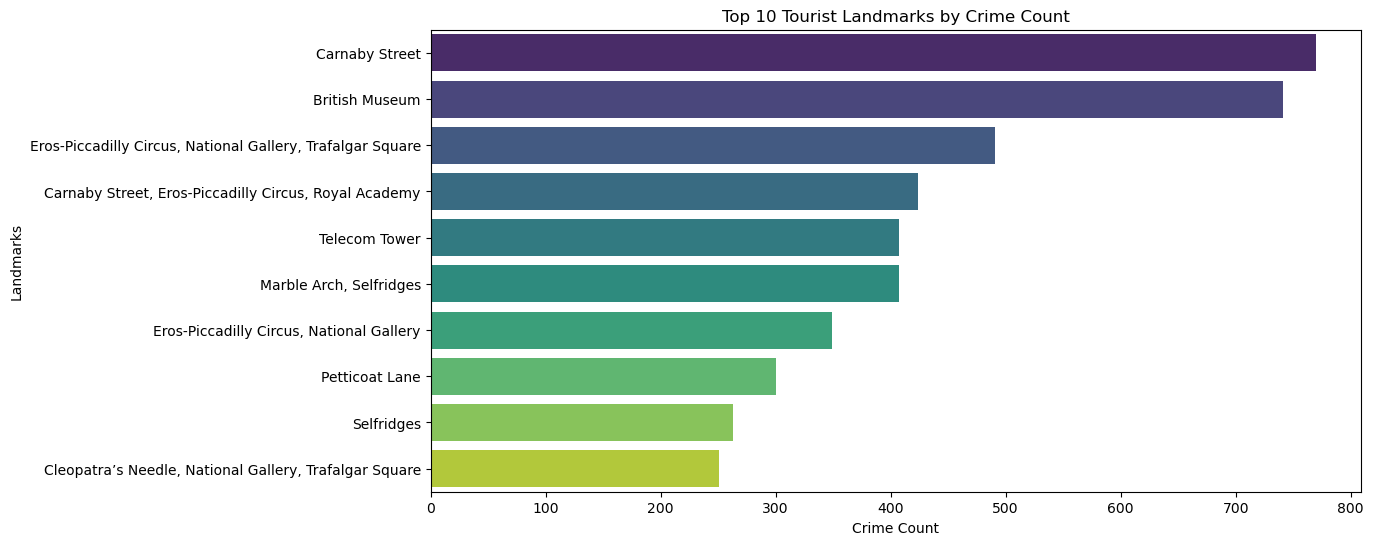

/tmp/ipykernel_201024/1767419996.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crimes_near_tourist_spots, y='Crime type', order=crimes_near_tourist_spots['Crime type'].value_counts().index, palette='coolwarm')


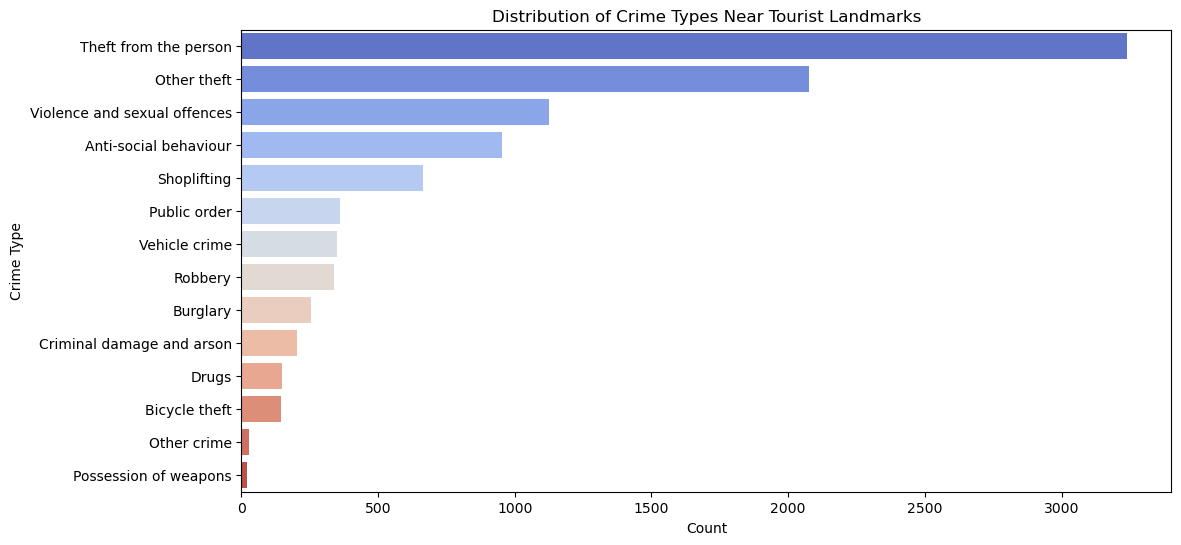

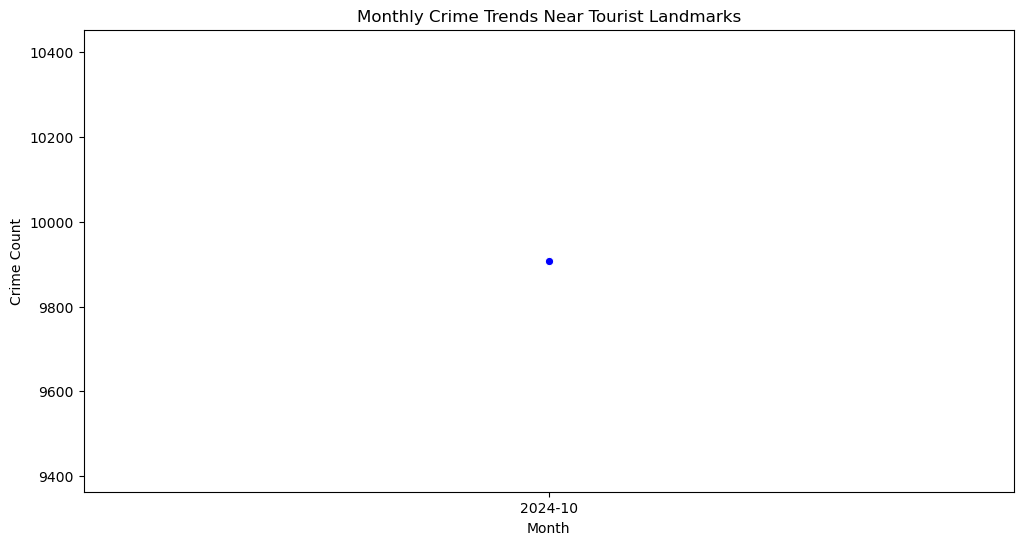

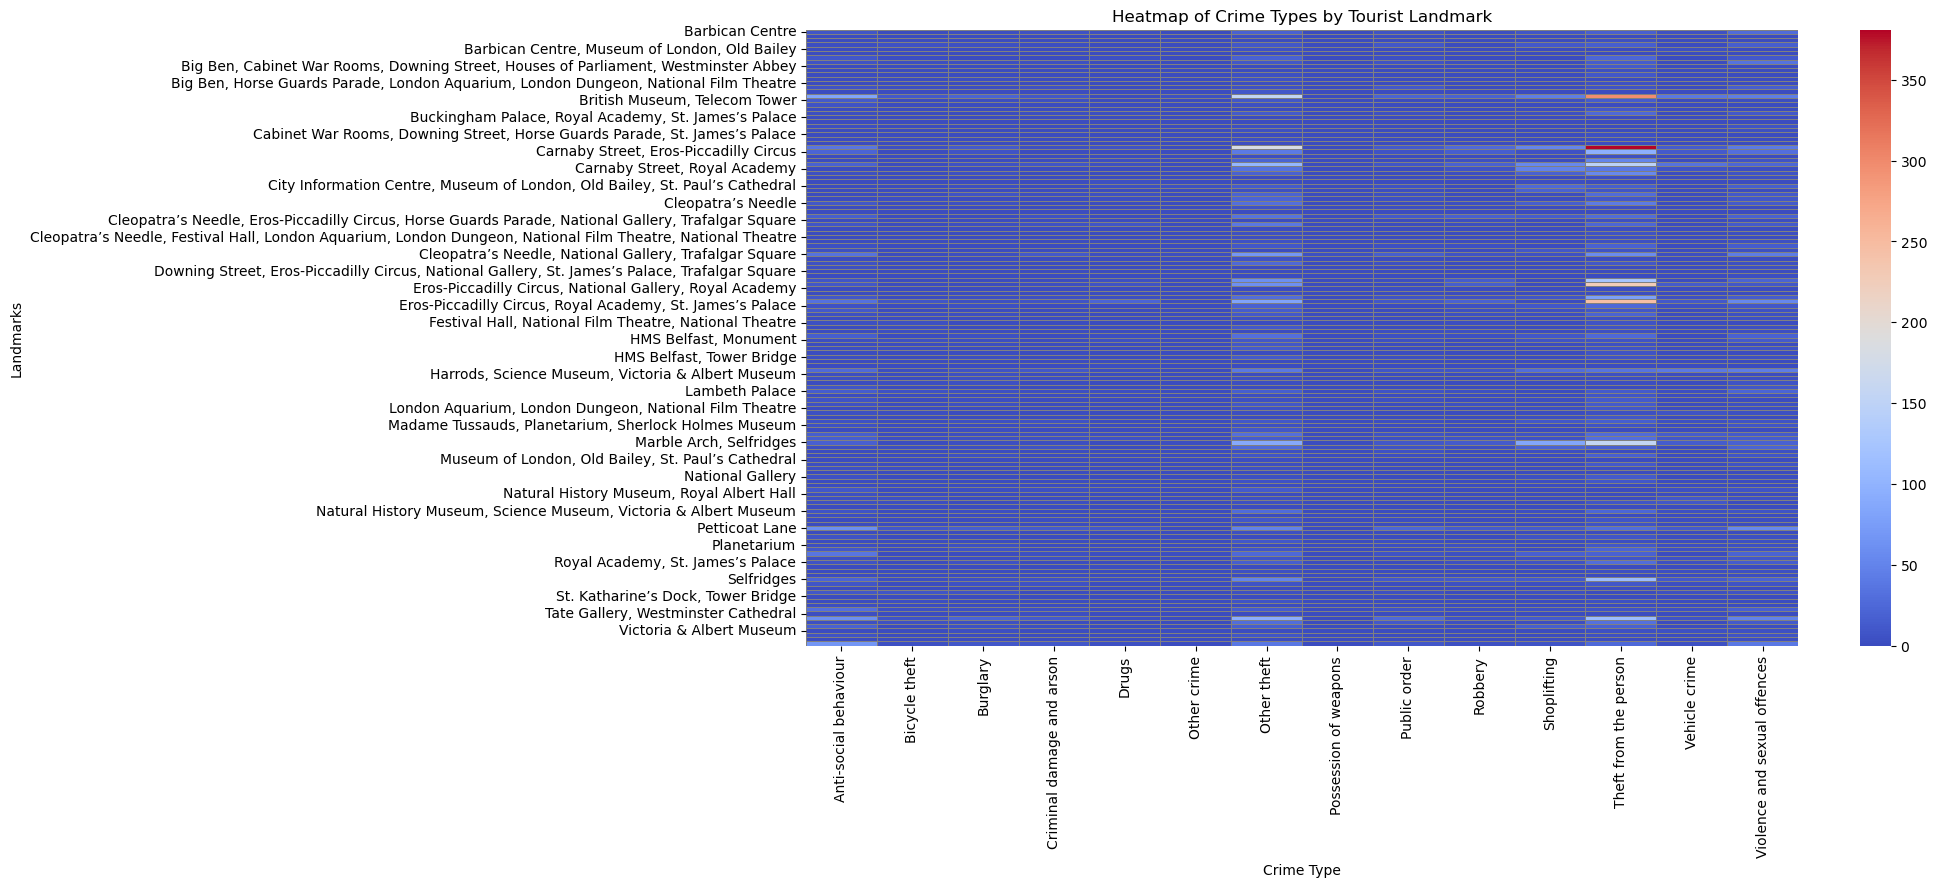

/tmp/ipykernel_201024/1767419996.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=crimes_near_tourist_spots, x='Crime Count', y='Nearby Landmarks', palette='Set3')


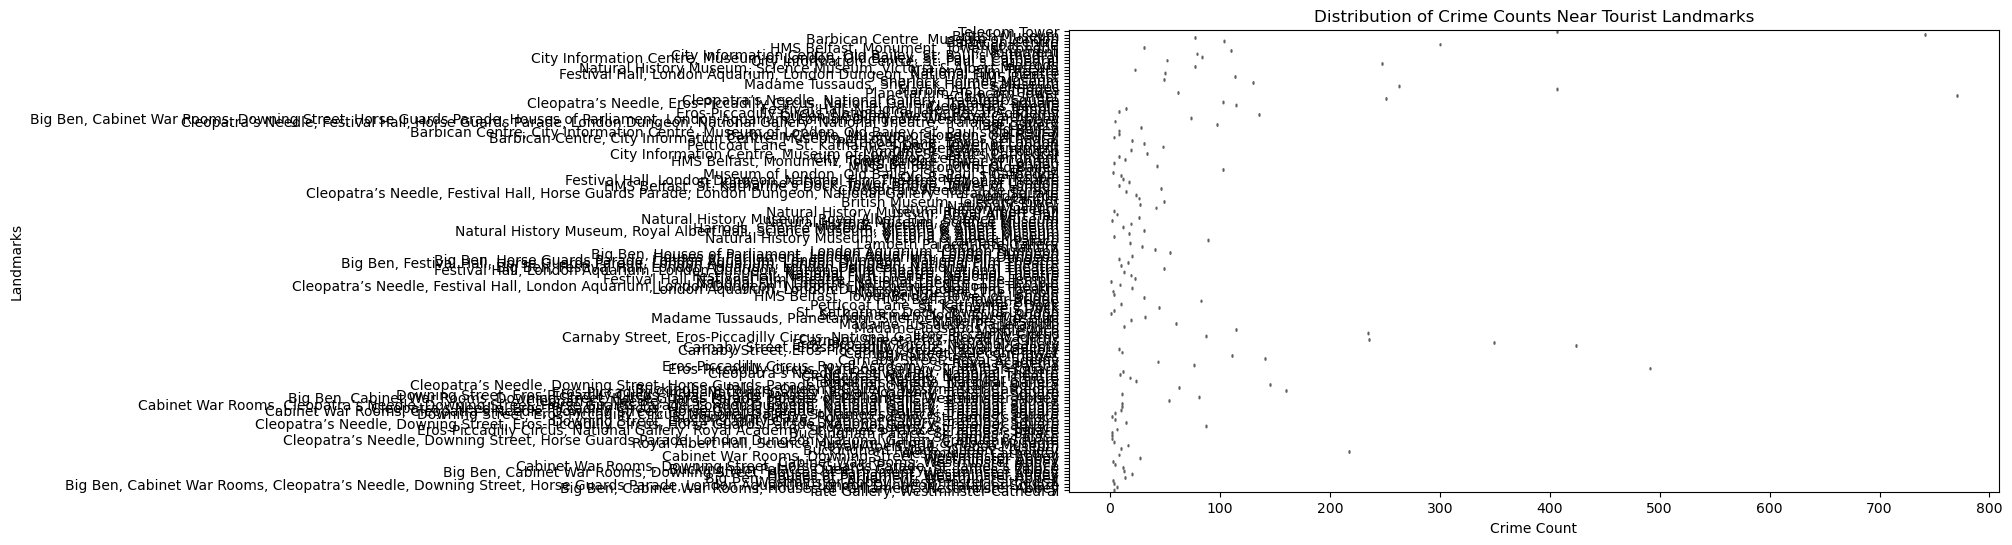

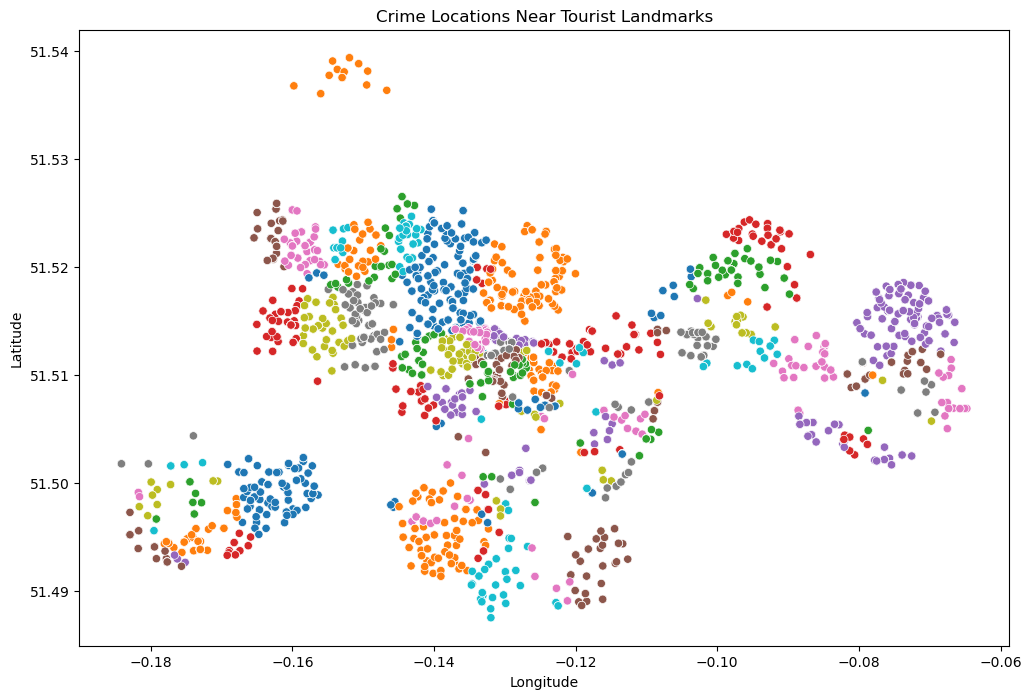

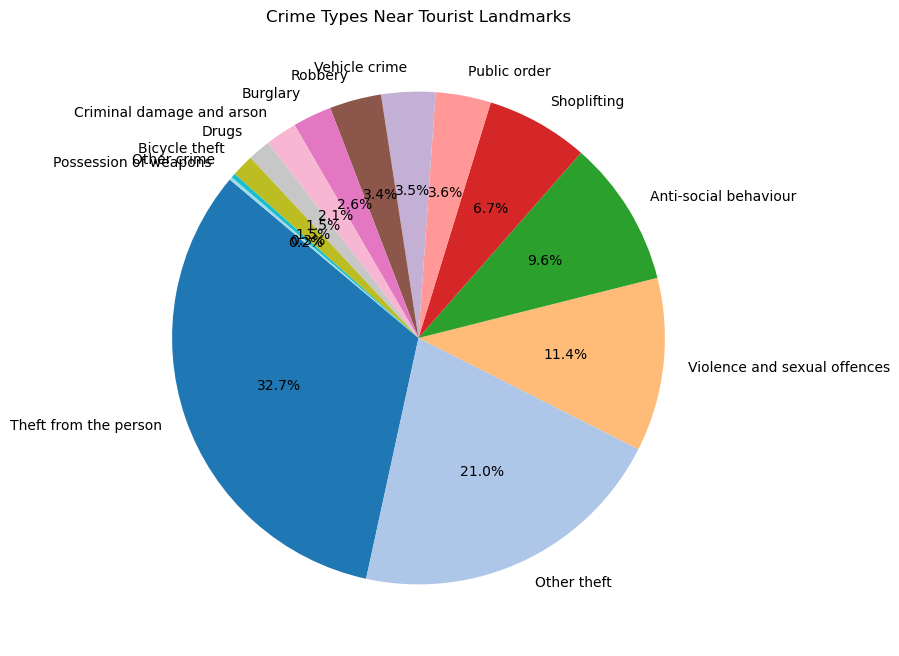

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
crimes_near_tourist_spots = pd.read_csv("crimes_near_tourist_spots.csv")

# Add a column for crime counts by landmark
landmark_crime_counts = crimes_near_tourist_spots.groupby('Nearby Landmarks').size().reset_index(name='Crime Count')
crimes_near_tourist_spots = crimes_near_tourist_spots.merge(landmark_crime_counts, on='Nearby Landmarks', how='left')

# Display basic info about the data
print(crimes_near_tourist_spots.head())
print(crimes_near_tourist_spots.info())

# Visualization 1: Top 10 landmarks by crime count
top_landmarks = landmark_crime_counts.sort_values('Crime Count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_landmarks, x='Crime Count', y='Nearby Landmarks', palette='viridis')
plt.title('Top 10 Tourist Landmarks by Crime Count')
plt.xlabel('Crime Count')
plt.ylabel('Landmarks')
plt.show()

# Visualization 2: Crime type distribution near tourist landmarks
plt.figure(figsize=(12, 6))
sns.countplot(data=crimes_near_tourist_spots, y='Crime type', order=crimes_near_tourist_spots['Crime type'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Crime Types Near Tourist Landmarks')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()

# Visualization 3: Monthly crime trends near tourist landmarks
monthly_crime_trends = crimes_near_tourist_spots.groupby('Month').size().reset_index(name='Crime Count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_crime_trends, x='Month', y='Crime Count', marker='o', color='blue')
plt.title('Monthly Crime Trends Near Tourist Landmarks')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.show()

# Visualization 4: Heatmap of crime types by landmark
crime_type_landmark = pd.crosstab(crimes_near_tourist_spots['Nearby Landmarks'], crimes_near_tourist_spots['Crime type'])
plt.figure(figsize=(16, 8))
sns.heatmap(crime_type_landmark, cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Crime Types by Tourist Landmark')
plt.xlabel('Crime Type')
plt.ylabel('Landmarks')
plt.show()

# Visualization 5: Boxplot of crime count distribution across landmarks
plt.figure(figsize=(12, 6))
sns.boxplot(data=crimes_near_tourist_spots, x='Crime Count', y='Nearby Landmarks', palette='Set3')
plt.title('Distribution of Crime Counts Near Tourist Landmarks')
plt.xlabel('Crime Count')
plt.ylabel('Landmarks')
plt.show()

# Visualization 6: Scatterplot of crime locations near landmarks
plt.figure(figsize=(12, 8))
sns.scatterplot(data=crimes_near_tourist_spots, x='Longitude', y='Latitude', hue='Nearby Landmarks', palette='tab10', legend=False)
plt.title('Crime Locations Near Tourist Landmarks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Visualization 7: Pie chart of crime types near tourist landmarks
crime_type_counts = crimes_near_tourist_spots['Crime type'].value_counts()
plt.figure(figsize=(8, 8))
crime_type_counts.plot.pie(autopct='%1.1f%%', cmap='tab20', startangle=140)
plt.title('Crime Types Near Tourist Landmarks')
plt.ylabel('')
plt.show()

# Logistic Regresison

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Load the data
data = pd.read_csv("crimes_near_tourist_spots.csv")

# Fill missing values
data.fillna({'Nearby Landmarks': 'None'}, inplace=True)

# Binary Target for Logistic Regression: Crime Near Landmark
data['Crime Near Landmark'] = data['Nearby Landmarks'].apply(lambda x: 1 if x != 'None' else 0)

# Encode categorical variables
le_crime_type = LabelEncoder()
data['Crime Type Encoded'] = le_crime_type.fit_transform(data['Crime type'])

# Feature selection
X = data[['Latitude', 'Longitude', 'Crime Near Landmark']]
y_binary = data['Crime Near Landmark']  # Binary target for logistic regression
y_multiclass = data['Crime Type Encoded']  # Multiclass target for crime type

# Train-test split
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.3, random_state=42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multiclass, test_size=0.3, random_state=42)


## Regressioon tree

In [6]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_multi, y_train_multi)

# Evaluate Random Forest
y_pred_multi_rf = rf.predict(X_test_multi)
print("Random Forest Report (Multiclass):")
print(classification_report(y_test_multi, y_pred_multi_rf))

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_multi, y_train_multi)

# Evaluate XGBoost
y_pred_multi_xgb = xgb_model.predict(X_test_multi)
print("XGBoost Report (Multiclass):")
print(classification_report(y_test_multi, y_pred_multi_xgb))


Random Forest Report (Multiclass):


/home/dragon/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dragon/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dragon/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.39      0.34      0.36       268
           1       0.03      0.03      0.03        36
           2       0.12      0.06      0.08        79
           3       0.14      0.06      0.08        66
           4       0.06      0.02      0.03        49
           5       0.00      0.00      0.00         6
           6       0.33      0.29      0.31       613
           7       0.00      0.00      0.00        11
           8       0.11      0.04      0.06       114
           9       0.00      0.00      0.00       110
          10       0.40      0.34      0.37       208
          11       0.45      0.68      0.54       958
          12       0.43      0.32      0.37       107
          13       0.28      0.23      0.25       348

    accuracy                           0.38      2973
   macro avg       0.19      0.17      0.18      2973
weighted avg       0.33      0.38      0.35      2973



/home/dragon/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:17:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Report (Multiclass):
              precision    recall  f1-score   support

           0       0.37      0.32      0.34       268
           1       0.07      0.03      0.04        36
           2       0.09      0.05      0.07        79
           3       0.14      0.05      0.07        66
           4       0.09      0.02      0.03        49
           5       0.00      0.00      0.00         6
           6       0.33      0.28      0.30       613
           7       0.00      0.00      0.00        11
           8       0.12      0.04      0.05       114
           9       0.00      0.00      0.00       110
          10       0.41      0.29      0.34       208
          11       0.43      0.73      0.54       958
          12       0.40      0.31      0.35       107
          13       0.32      0.22      0.26       348

    accuracy                           0.38      2973
   macro avg       0.20      0.17      0.17      2973
weighted avg       0.33      0.38      0.34      29

/home/dragon/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dragon/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dragon/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Random Forest

In [7]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Encode 'Crime type' numerically (if not already encoded)
le_crime_type = LabelEncoder()
data['Crime Type Encoded'] = le_crime_type.fit_transform(data['Crime type'])

# Select features and target
X = data[['Latitude', 'Longitude']]  # Features: geographical coordinates
y = data['Crime Type Encoded']       # Target: encoded crime type

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# Create and train a Decision Tree Regressor
reg_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
reg_tree.fit(X_train, y_train)

# Predict on test data
y_pred = reg_tree.predict(X_test)


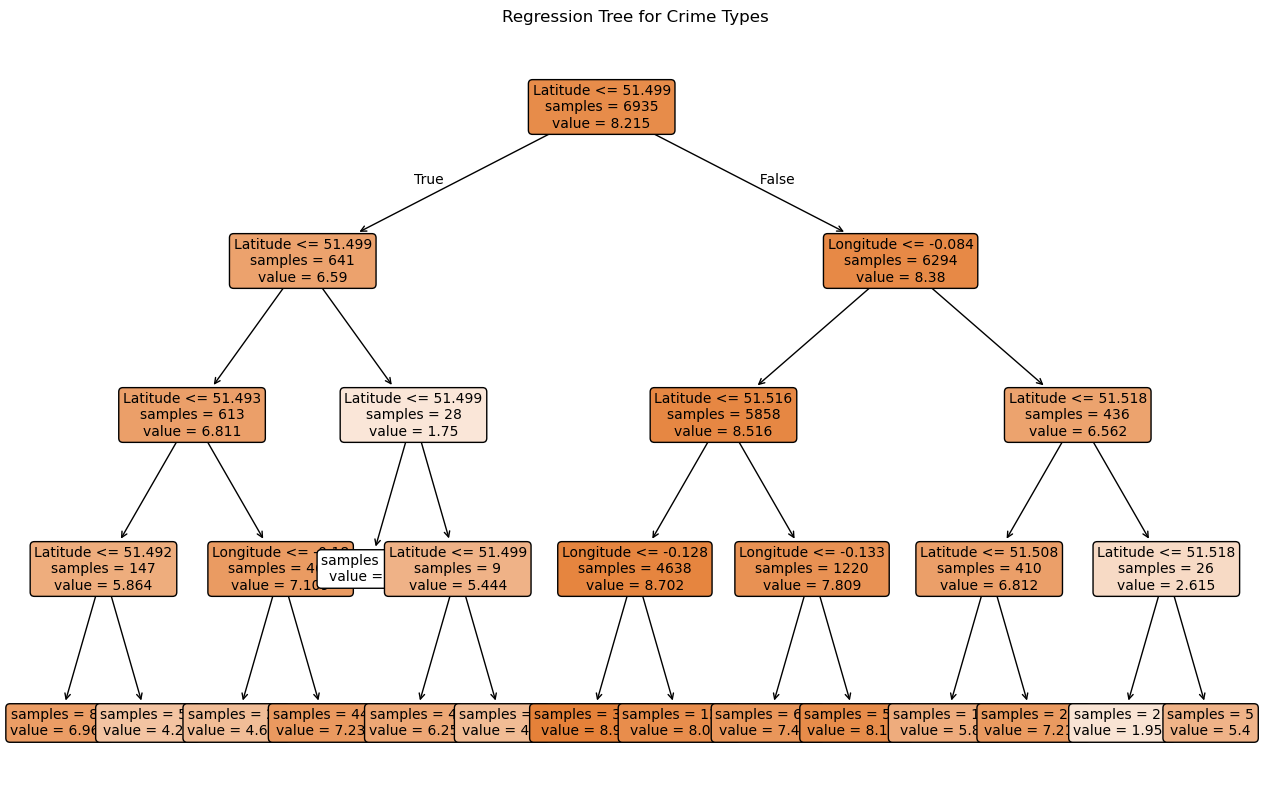

In [9]:
# Plot the decision tree
plt.figure(figsize=(16, 10))
plot_tree(
    reg_tree,
    feature_names=['Latitude', 'Longitude'],
    filled=True,
    rounded=True,
    fontsize=10,
    impurity=False
)
plt.title("Regression Tree for Crime Types")
plt.show()


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate model predictions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Model summary
print("Model Summary:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Summary:
Mean Absolute Error (MAE): 3.24
Mean Squared Error (MSE): 14.80
R² Score: 0.05


## Kmeans Clustering

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numeric features
features = crimes_near_tourist_spots[['Latitude', 'Longitude', 'Crime Count']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


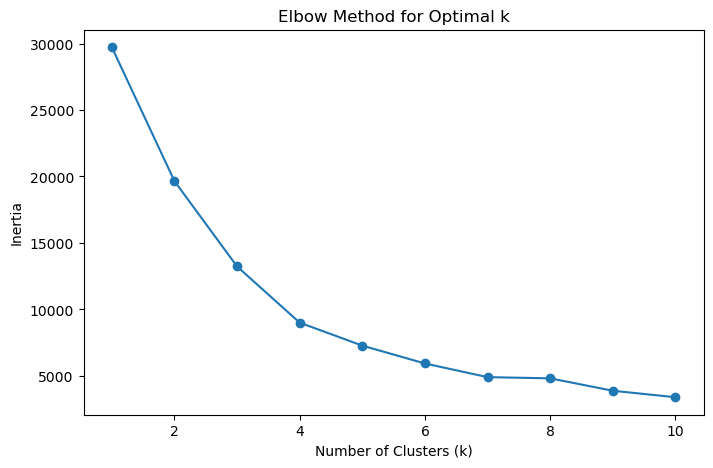

In [12]:
# Find optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [13]:
# Assuming optimal k from the elbow method
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataset
crimes_near_tourist_spots['Cluster'] = cluster_labels


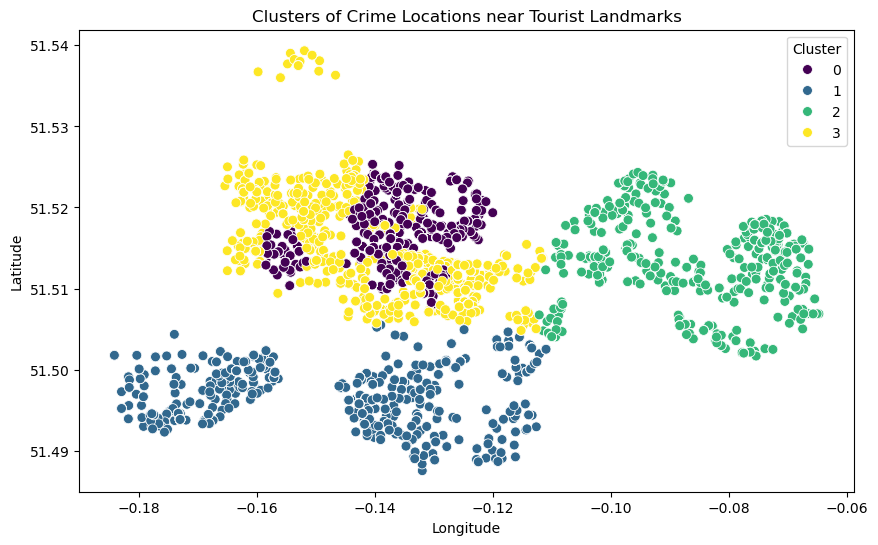

In [14]:
import seaborn as sns

# Scatter plot of clusters based on latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Longitude', y='Latitude', hue='Cluster', data=crimes_near_tourist_spots,
    palette='viridis', s=50
)
plt.title('Clusters of Crime Locations near Tourist Landmarks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()
